<a href='http://www.scienceacademy.ca'> <img style="float: left;height:70px" src="Log_SA.jpeg"></a>

If you have not installed the required package/library so far:
<br>Anaconda users: **conda install nltk=3.2.3**<br>
Others: **pip install nltk=3.2.3**<br>
*Please use the suggested version to avoid any related issues, once you finish the course, you can always try other versions, they are not very different* <br>
**Thanks**

# Natural Language Processing (NLP) with Python
## (additional topic in the course)


Hi Guys, <br>

Welcome to the Natural Language Processing with Python. Mystery of Natural Language still needs to be solved. Natural Language Processing (NLP) is challenging and one of the most demanding skills in the field of Data Science. Challenges in NPL frequently involve speech recognition, natural-language understanding, and natural-language generation.<br> 

We generate data in several ways, speaking, writing, messaging and so many other ways. Majority of the data, we generate, exists in the text format, a highly unstructured data in nature. According to the studies, more tha [80% of the available data is in un-structured form](https://support.sas.com/resources/papers/proceedings14/1288-2014.pdf).<br>

&#9758; *<font style="font-size:14px;color:green;">Few very common examples of generating data in our daily life includes: Posts on social media (e.g. FaceBook, Tweeter etc), chat conversations among users, news, blogs, research or any other type of articles, books, product or services reviews, patient records, health-care data and much more. Another recent AI ways include chatbots and voice driven bots. So much unstructured data!!!</font>*


Without processing (reading and understanding) text data, we can not present the conclusions or take actions accordingly. Either we have to manually analyze this huge amount of data (which is growing exponentially with time) or we need some kind of automated system to do this data analysis for us. 

In order to produce actionable insights from text data, it is very important to get familiar with the techniques and principles of Natural Language Processing (NLP). Today, NPL is a big topic and could easily fit into several course in your college life. However, we will try to learn the as much as possible using practical approach with real dataset. <br>


In this section, we are going to discuss and overview the basics of Natural Language Processing. This consists of combining machine learning techniques with text, and using maths and statistics to get that text in a format that a machine learning algorithms can understand!<br>

Let's work with [SMS Spam Collection Data Set](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection). The dataset is a public set of SMS labeled messages that have been collected for mobile phone spam research. The dataset is a part of [UCI repository](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) and was donated for public use in 2012. This rich dataset contain over 5000 instances and is a great dataset to start with NLP. You can either download the dataset UCI website or use the one which is provided in the course. If you decided to download from the UCI website directly, you will get a folder contain dataset along with readme file, which contain the description on the dataset.<br>   

**Required libraries:**<br> 
In order to work with NLP, we need to have Python's [NLTK (Natural Language Toolkit)](https://www.nltk.org) installed. Instructions are provided in the lecture notes and I hope you have already installed this library. We also need to download the corpus for stopwords to work with this project. <br>

[Official documentation for nltk is always a great resource!](http://www.nltk.org)<br>
[Working With Text Data--Tutorial on scikit-learn](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)

Please note, we will learn several useful concepts and their use in NLP along the way. <br>
Let's import nltk to start with!

In [1]:
import nltk

nltk comes with a collection of packages. Let's download the `stopwords` at the moment. In order to do this, we can use [`download_shell()`](http://www.nltk.org/api/nltk.html?highlight=download_shell#nltk.downloader.download_shell) to open an interactive shell. This allows us to explore the available packages and either we can download all or the one we need!  <br>
You will see these options:<br>
`d) Download   l) List    u) Update   c) Config   h) Help   q) Quit` <br>
to **see the list** of packages, enter **l**. To **download**, enter **d** and then enter the package name, `stopwords` in this case.<br> 
I have already downloaded the package, it will say `Package stopwords is already up-to-date!`<br>
Let's see how it works!

In [2]:
#nltk.download_shell()

Let's see how the messages look like and read the dataset in `sms` using list comprehension!<br>

&#9758; *<font style="font-size:14px;color:green;">Although, we can use use `line.rstrip()` to removes whitespace, newline characters, tab characters, and characters (\n \t \r respectively) from the tail of a line. <b>We don't need it here because we are going to use the power of pandas</b> to read such files rather than parsing them manually</font>*  

In [3]:
sms = [line for line in open('smsspamcollection/SMSSpamCollection')]

Let's see how many messages we have in the list 'sms'. Let's re-confirm the type of sms as well

In [4]:
len(sms), type(sms)

(5574, list)

We have 5574 messages in the corpus, we can check any message e.g. for 2 sms[1]. 

In [5]:
#Let's see how the message looks like
sms[1]

'ham\tOk lar... Joking wif u oni...\n'

What we see, the file is tab separated `(\t)`. <br>
* The first column will be the label/target "ham/spam".
* The second column will be the actual message. 

Let's use the power of pandas to read the text file in a dataframe with ham/spam as target and message as 'sms'.<br>
We know the file is tab separated, let pass `sep = '\t'`

In [6]:
#import pandas first
import pandas as pd

In [7]:
#Reading file with sep = '\t'. We can output the head of our dataframe
df = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',
                names=['target', 'sms'])
df.head()

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Lets use `info()` and `describe()` methods on our dataframe.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
target    5572 non-null object
sms       5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [9]:
df.describe()

,target,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


So, we have 2 unique labels. There are less unique message as compared to the actual count, this means there are repeated message in the dataset. This makes sense as some repeated messages could be the standard and very common messages e.g. 'Sorry, I'll call later', 'yes', 'no' etc. <br>

**Let's use `describe()` on the grouped message as ham or spam. <br>
Recall, `groupby()` method. **

In [10]:
df.groupby('target').describe()

sms                                                               
       count unique                                                top freq
target                                                                     
ham     4825   4516                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

This gives a little more insight of the dataset. We see, most of the messages are ham, the common one is 'Sorry, I'll call later' whereas the most common spam message is 'Please call our customer service....'.<br> 


## Feature Engineering
In NLP, feature engineering has significant importance, which is usually a large part of processing. Feature engineering involves deep understanding of the field in which you are working, called domain knowledge.  
By definition, feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. This is fundamental to the application of machine learning, and is both difficult and expensive.<br>

&#9758; <font style="font-size:13px;color:green;">*Feature engineering is another big area of expertise, as a data scientist, you learn to extract features based on your domain knowledge. If you are interested and want to learn more, [Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists](https://www.amazon.com/Feature-Engineering-Machine-Learning-Principles-ebook/dp/B07BNX4MWC) is a good book to read. Wikipedia's article on [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering) also provide a good summary on this topic.*</font>

One of the obvious thing is the length of the message in this dataset. We can create this feature and add a new column into our dataframe with the length of each message. We can then see if there is any trend or correlation between length of the message and its class "ham/spam".<br>

Let's create a column length!<br>
*Recall `.apply()`method! We can use this along with `len()`*

In [11]:
df['length'] = df['sms'].apply(len)
df.head()

,target,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Data Visualization 
Let's do some imports and visualize the data. We may get some more information from the data visualization!

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
# Let's use pandas built-in data visualization capabilities here
# df['length'].plot(bins=70, kind='hist') 

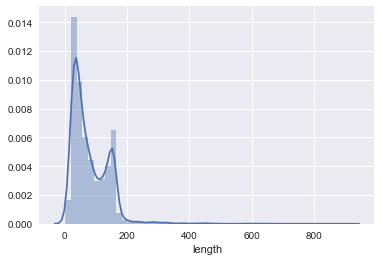

In [14]:
# Let's use sns distplot here 
sns.distplot(df['length'])

We can clearly see a bimodal distribution in the length column. Looks like, the choice of the length of the message during feature engineering was a good option.<br>
Let's explore more, we can plot ham and spam separately! -- we can use pandas data visualization capabilities as well!

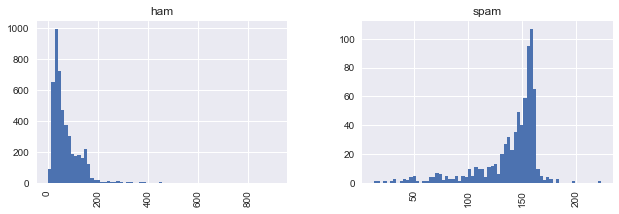

In [15]:
df.hist(column='length', by='target', bins=70,figsize=(10,3));

From the plots above, we see that there is a general trend in ham and spam messages. Generally, ham messages are under 200 characters! <br>
Looks like, our newly created feature worked very good and suggest that we can separate the ham vs spam messages based on this feature!

## Text Preprocessing 

This is a classification problem in which we are trying to predict two classes, ham or spam. In order to train our Machine learning model, we need to convert all the text strings into some kind of numerical data. We have learned the concepts behind such conversion in the lecture. Its time to apply that knowledge. <br>

Recall, the bag-of-words (BoW) approach, where each word in the text is represented by a number. <br>
Let's convert the raw strings of our messages -- sequence of characters, into vectors -- sequences of numbers.<br>
* First thing to do is, to get rid of punctuations in the messages. *Recall basic String methods in Python - early lectures*
* Second, convert the messages into their individual words and return a list.
* Third, we will remove very common words ('the', 'a', 'is'... etc) from the list of words of the messages. These are stopwords! --- *good to know, most of the search engines are programmed to ignore stopwords!*

To remove punctuations, we can use Python's built-in string library `string.punctuation` to get a quick list of all the possible punctuation .<br>

Let's see how this all will work on a **sample string first!**

In [16]:
# do the import
import string

# create a sample with punctuations
s = 'is this a sample message! if yes, remove punctuations.'

Let's check what string.punctuation is!

In [17]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

#### Removing punctuations.
Check characters if there are punctuations in 's' and get a list 

In [18]:
nopunc = [char for char in s if char not in string.punctuation]
nopunc[0:10] # you can print complete list, its long!

['i', 's', ' ', 't', 'h', 'i', 's', ' ', 'a', ' ']

Now. let's join the characters again at '' (white space) to form the string.

In [19]:
nopunc = ''.join(nopunc)
nopunc

'is this a sample message if yes remove punctuations'

#### Removing stop-words.
Now let's see how to remove **`stopwords`**. Remember, we installed `stopwords` package in the beginning. We need to import that package and apply on `nopunc` to remove the **English stopwords**.

In [20]:
# do the import for stopwords
from nltk.corpus import stopwords
# Just to see first 5 English stopwords
stopwords.words('english')[0:5] 

['i', 'me', 'my', 'myself', 'we']

We need to split `nopunc` into its words, deal with the lower and upper case and get a list of those which are not in `stopwords.words`.<br>
We can use list comprehension here. *Recall the early lectures in Python Essentials!*

In [21]:
# removing all stopwords
clean_s = [word for word in nopunc.split() 
              if word.lower() not in stopwords.words('english')]

#Let's compare the input anf output 
print('Input was: ',nopunc.split())
print('Output is: ',clean_s)

Input was:  ['is', 'this', 'a', 'sample', 'message', 'if', 'yes', 'remove', 'punctuations']
Output is:  ['sample', 'message', 'yes', 'remove', 'punctuations']


We have worked with the sample sentence, **Let's apply all the above steps to our dataframe of messages, the simple way is to create a function with all the steps and use `apply()` to do the processing**<br>
We will write a function `"process_text(raw_text)` and pass in the raw text. The function will take the string of raw text and perform the following:
* Remove all punctuation
* Remove all stopwords
* Returns a list of the cleaned text

Let's write a function to do the above steps, we will use this function soon.  

In [22]:
def process_text(raw_text):
    # Check for the punctuations 
    nopunc = [char for char in raw_text 
              if char not in string.punctuation]

    # Join the characters 
    nopunc = ''.join(nopunc)
    
    # Remove stopwords (if any)
    return [word for word in nopunc.split() 
            if word.lower() not in stopwords.words('english')]

### Tokenization
For a given character sequence and a defined document unit, **tokenization** is the task of chopping it up into pieces, called tokens , perhaps at the same time throwing away certain characters, such as punctuation. <br>
For example:<br>

* **Input:** Friends, Romans, Countrymen, lend me your ears; 
* **Output:** Friends Romans Countrymen lend me your ears

These tokens are often loosely referred to as terms or words, but it is sometimes important to make a type/token distinction.<br>

Let's do the Tokenization Now! We can grab few messages from the dataframe and see how the function `process_text(raw_text)` works!

In [23]:
#Before tokenization
df['sms'].head(2)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
Name: sms, dtype: object

In [24]:
#After tokenization
df['sms'].head(2).apply(process_text)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
Name: sms, dtype: object

Notice, the stopwords are removed and we got the list of tokens that are actually the words we want.<br>
**Before we move on, let's pause and learn another useful concepts in Text Normalization.**<br>

There are lots of ways to normalize the text data. In this example, we have used a simple text normalization in our text pre-processing. NLTK library has a good number of built-in tools {*[Check the documentation on nltk official website](http://www.nltk.org/book/ch03.html)*} and very helpful documentation on other method of text normalization. <br>
The key concepts in NLP, including **tokenization and stemming**.<br> 
*<b>Stemming</b> involves the extraction of stem words in the text normalization, for example, if we have similar words in our text, such as, `[play, playing, played]`, the only useful word is play, stemming tries to return only `[play]`.* <br>

In our dataset, stemming may not be useful because of the presence of several shorthand words `[U, dun, 2, u, c, Nah, .....]` which is common in the text messages. Stemming may not be very helpful in our particular dataset, however, it works greatly in several cases such as news data, books, research articles etc. <br>

&#9758; *Another important thing is dealing with currency symbols and other type of regular expressions. Please consult the documentation of [Processing Raw Text](http://www.nltk.org/book/ch03.html) to learn more about this.*<br><br><br>
Let's apply `process_text()` to the `sms` column in our dataframe to get the **tokens**

In [25]:
#tokenization on df['sms']
df['sms'].apply(process_text);

### Vectorization
We have created a method to get the lists of tokens. As already mentioned, in order to do Machine Learning using scikit-learn, we need to convert each message into a vector form, so that the Machine Learning model can understand.

Recall the **Bag of words (BoW)** technique from the lecture notes!<br>
We will do the following steps using BoW model now.

1. **Term Frequency**, by counting how many times does a word appeared in each message.

2. **Inverse Document Frequency**, which is actually a weigh the counts *(recall lecture notes)*, frequent tokens get lower weight.

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

Recall from the lecture notes, how the first step will look like after Term Frequency (the values / numbers in the table below):

<table border = “1“>
<tr>
<th></th> <th>SMS_1</th> <th>SMS_2</th> <th>...</th> <th>SMS_n</th> 
</tr>
<tr>
<td><b>Word_1</b></td><td>3</td><td>0</td><td>...</td><td>5</td>
</tr>
<tr>
<td><b>Word_2</b></td><td>2</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>...</td><td>...</td><td>...</td><td>...</td>
</tr>
<tr>
<td><b>Word_n</b></td> <td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
</table>



Each vector have as many dimensions as there are unique words in the SMS corpus.<br>
scikit-learn have a built-in tool, [**CountVectorizer**](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) which convert a collection of text documents to a matrix of token counts.

Let me introduce another term here:<br>
[**Sparse Matrix**](https://en.wikipedia.org/wiki/Sparse_matrix): In numerical analysis and computer science, a sparse matrix or sparse array is a matrix in which most of the elements are zero.<br>

*&#9758; Imagine, how many zeros you should expect in you matrix of token counts?<br>
Lots!, since, there are so many messages, so many words in the BoW and lots missing in each message! right? You will get a sparse matrix! <br>*

Anyhow, let's move on and import `CountVectorizer`!

In [26]:
#Importing CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

&#9758; `CountVectorizer()` and `shit+tab` for the doc string<br>

We can pass a range of parameters to the `CountVectorizer`. In this case, we are going to pass `analyzer = process_text`, which is our own created function.<br>
In the output, we will get a **BoW** (e.g. we call it 'bow_transformer' here) after processing text according to the analyzer. The text data is large and processing might get some time, depends upon your computer etc. We are creating a very large matrix, all the rows are words and  <br>
Let's fit the `CountVectorizer()` to `sms` column of our dataframe.

In [27]:
bow_transformer = CountVectorizer(
    analyzer=process_text).fit(df['sms'])

In [28]:
# How many words we got in the vocabulary?
print(len(bow_transformer.vocabulary_))

11425


In [29]:
#type(bow_transformer.vocabulary_)#['way'] #to get the word's id 
bow_transformer.vocabulary_.get('way') #to get the word's id / index 

10979

To get better understanding of the working process, I think, its a good idea to transform a single sms to its bow count as a vector first. We need to call `.transform` on the bow_transformer and pass in the selected sms. 

In [30]:
# grabbing message at index 18 -- 19th message (index starts at 0)
sms_18 = df['sms'][18]

#Transforming sms_18 to its bow (bow_18)
bow_18 = bow_transformer.transform([sms_18])

# how the bow_18 look like and what is its shape, let's check 
print(bow_18)
print(bow_18.shape) #(n_rows, n_cols) -- shape is 1 by our entire vocabulary

  (0, 1914)	1
  (0, 3964)	1
  (0, 4880)	1
  (0, 6517)	1
  (0, 6907)	1
  (0, 10405)	1
  (0, 10698)	1
  (0, 10979)	2
(1, 11425)


In [31]:
#type(bow_18)
#print(bow_18.shape)

There are 8 unique words in the selected sms (after removing common stop words). Once is appeared twice, let's check the one which appeared twice in the sms! <br>
From the `bow_transformer` we can call the method, `get_feature_names()`, and ask for the for the repeated word, its index 10979.  

In [32]:
print(bow_transformer.get_feature_names()[10979])

way


So, the word "**way**" appeared twice. <br><br>
Now, Let's move on and use `.transform` with `bow_transformer` and transform the entire DataFrame of sms corpus.

In [33]:
df_bow = bow_transformer.transform(df['sms'])

We can get the shape of our df_bow matrix (matrix of token counts) and also check how many of its element are non-zero.

In [34]:
print('Shape of matrix of token counts(sms_bow): ', df_bow.shape) # (n_rows, n_cols)
print('No of Non-Zero elements: ', df_bow.nnz)

Shape of matrix of token counts(sms_bow):  (5572, 11425)
No of Non-Zero elements:  50548


We can compute the sparsity of the matrix using the formula below.

In [35]:
total_no_of_elements = df_bow.shape[0] * df_bow.shape[1]
sparsity = (df_bow.nnz / total_no_of_elements)*100
print('sparsity of df_bow matrix: {}' .format(sparsity))

sparsity of df_bow matrix: 0.07940295412668218


**Excellent!**<br>
* **We are done with term frequency.** How many times a word/term appeared in a sms e.g. way appeared 2 times in sms_18<br>
* **Its time to compute for term weighting and normalization using TF-IDF (reference to the lecture notes with practical examples).** <br>

scikit-learn provides a tool `TfidfTransformer`, let's do this!

In [36]:
# Doing import 
from sklearn.feature_extraction.text import TfidfTransformer

In [37]:
# Let's create an instance for TfidfTransformer and fit to the df_bow
tfidf_trans = TfidfTransformer()
tfidf_trans.fit(df_bow)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

As previously done, for better understanding, **lets work with a single message "sms_18" and transform "bow_18" to tfidf.** 

In [38]:
tfidf_18 = tfidf_trans.transform(bow_18)
#lets print TF-IDF for the message 18
print(tfidf_18)

  (0, 10979)	0.461428791272
  (0, 10698)	0.14951677306
  (0, 10405)	0.407177880884
  (0, 6907)	0.407177880884
  (0, 6517)	0.257793651128
  (0, 4880)	0.259547084742
  (0, 3964)	0.407177880884
  (0, 1914)	0.365410001719


Above are the weight values of each of the word in sms_18, the relationship between TF and IDF.<br>
We can check IDF for any single random word as well, let's try the one which came twice in sms_18 "**way**"!

In [39]:
print('IDF for "Way" is: ',tfidf_trans.idf_[bow_transformer.vocabulary_['way']])

IDF for "Way" is:  5.0613405961


Now, we got better idea on weighting, lets transfer our entire BoW "sms_bow" to TF-IDF corpus! <br>
*Instead of passing a single sms as a BoW, we will pass the entire corpus.* 

In [40]:
df_tfidf = tfidf_trans.transform(df_bow)

In [41]:
# Let's check the shape of sms_tfidf
df_tfidf.shape

(5572, 11425)

## Machine Learning -- Training and evaluating the model  
Now, as we have transformed our data into its vector form, we can train our Machine Learning algorithm.<br>
Its a spam/ham detection, a classification problem. We have already learned several models for classification problem and use any one of them. However, [Naive Bayes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier#cite_note-rennie-2) is considered as a good choice in text retrieval community. With appropriate pre-processing, Naive Bayes is competitive in this domain with more advanced methods including support vector machines, [Reference link](http://people.csail.mit.edu/jrennie/papers/icml03-nb.pdf). <br>
Let's use the one which is accepted by the experts as a better choice!
and import multinomial Naive Bayes model, [MultinomialNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) from sklearn. 

In [42]:
# Let's do the import for Naive Bayes
from sklearn.naive_bayes import MultinomialNB

In [43]:
# creating instance
spam_ham_detection = MultinomialNB()

In [44]:
# train test split
from sklearn.model_selection import train_test_split 
X = df_tfidf
y = df['target']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [46]:
# training on train data
spam_ham_detection.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

**Evaluation**<br>
This is good, we got the model which is doing predictions for ham/spam messages!<br>
Let's try the model on entire dataframe.

In [47]:
# predictions for the test data
pred = spam_ham_detection.predict(X_test)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
print (confusion_matrix(y_test, pred))
print (classification_report(y_test, pred))

[[1593    0]
 [  71  175]]
             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1593
       spam       1.00      0.71      0.83       246

avg / total       0.96      0.96      0.96      1839



In the Machine Learning section we have used vectorized form of our dataframe `df_tfidf` while split. **This is not what we usually do.** We did this here, becasue we want to follow the flow and for learning and training purpose. Let me introduce a great feature from scikit-learn, `Pipeline` capabilities to store a pipeline of workflow.<br>
## [Pipeline](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) 
The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. We can set up all the transformation, we did during the text processing, in a single unit using pipeline feature of scikit-learn. Rather than doing all steps one-by-one, we can then call that single unit for our data processing. In this way, we save lots of time and there is no need to re-do all the transformation steps manually. A simple call of pipeline object, with stored steps, on the data will do all the processing in future.  <br>

Let's see this will work on our dataset!
Let's do the **`train_test_split()`** again using our raw data. <br>


In [49]:
# train_test_split() on the raw data
X = df['sms']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

### Creating pipeline, need to do import first

In [50]:
from sklearn.pipeline import Pipeline

In [51]:
pipeline = Pipeline([
    # Tokenization using scikit's CountVectorizer 
    ('baw', CountVectorizer(analyzer=process_text)),  
    
    # Computing TF-IDF  -- weighted scores
    ('tfidf', TfidfTransformer()),  
    
     # Naive Bayes classifier to train on TF-IDF vectors
    ('model_nb', MultinomialNB()), 
])

**Traing / Fitting using pipeline**

In [52]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('baw', CountVectorizer(analyzer=<function process_text at 0x112954400>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,..._tf=False, use_idf=True)), ('model_nb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

**Predictions**

In [53]:
# predictions for the test data
pred = pipeline.predict(X_test)

**Evaluation**

In [54]:
print (confusion_matrix(y_test, pred))
print (classification_report(y_test, pred))

[[1593    0]
 [  65  181]]
             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1593
       spam       1.00      0.74      0.85       246

avg / total       0.97      0.96      0.96      1839



# Excellent work!
I know this was long. I hope you enjoyed working with the real dataset. NPL is a great skill to add in your profile. It is kind of a sub-field of Machine Learning and need practice along with the domain knowledge. <br>

### To Do!
Try using other models such as SVM or Random Forests instead of Naive Bayes and compare your results. It is easy, you only need to change the classifier in the pipeline and re-run. <br>
Please do this yourself first. I have already tried Logistic Regression and Random Forests for you, in case you need help. You will see how useful this pipeline feature is! <br>
In the real world data, you will set-up the transformations and create such pipeline to make things easier and try different options!  

### Logistic Regression Classifier

In [55]:
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    ('baw', CountVectorizer(analyzer=process_text)),  
    ('tfidf', TfidfTransformer()),  
    
     # only change is RandomForestClassifier() 
    ('model', LogisticRegression()), 
])
# training the model
pipeline.fit(X_train,y_train)
# doing predictions
pred = pipeline.predict(X_test)
#Evaluation
print (confusion_matrix(y_test, pred))
print (classification_report(y_test, pred))

[[1589    4]
 [  91  155]]
             precision    recall  f1-score   support

        ham       0.95      1.00      0.97      1593
       spam       0.97      0.63      0.77       246

avg / total       0.95      0.95      0.94      1839



### Random Forests Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('baw', CountVectorizer(analyzer=process_text)),  
    ('tfidf', TfidfTransformer()),  
    
     # only change is RandomForestClassifier() 
    ('model', RandomForestClassifier()), 
])

# training the model
pipeline.fit(X_train,y_train)
# doing predictions
pred = pipeline.predict(X_test)
#Evaluation
print (confusion_matrix(y_test, pred))
print (classification_report(y_test, pred))

[[1592    1]
 [  64  182]]
             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1593
       spam       0.99      0.74      0.85       246

avg / total       0.97      0.96      0.96      1839



**Just a brush-up reminder, you may want to give a quick look at:**<br>
* **[`precision and recall`](https://en.wikipedia.org/wiki/Precision_and_recall)**
* **[`f1-score`](https://en.wikipedia.org/wiki/F1_score)**